In [11]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [12]:
def plot(image):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

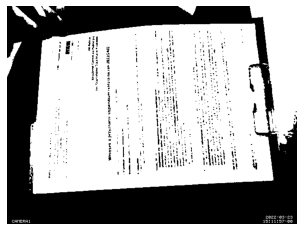

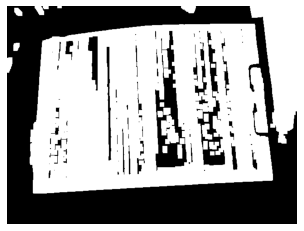

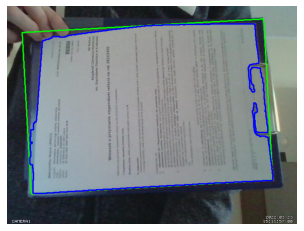

In [14]:
image = cv2.imread('img1.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

_, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

plot(thresh)

kernel = np.ones((3, 3))
thresh = cv2.erode(thresh, kernel, iterations=4)
thresh = cv2.dilate(thresh, kernel, iterations=4)

plot(thresh)

contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

contours = filter(lambda cont: cv2.arcLength(cont, False) > 1000, contours)
contours = filter(lambda cont: cv2.contourArea(cont) > 10000, contours)

for contour in contours:
    rect = cv2.minAreaRect(contour)
    box = cv2.boxPoints(rect).astype(np.int0)
    
    image_copy = image.copy()

    cv2.drawContours(image_copy, [box], -1, (0, 255, 0), 2)
    cv2.drawContours(image_copy, [contour], -1, (255,0,0), 2)
    plot(image_copy)